앞서 사과, 파인애플, 바나나에 있는 각 픽셀의 평균값을 구해서 가장 가까운 사진을 골랐다. 이 경우에는 사과, 파인애플, 바나나 사진임을 미리 알고 있었기 때문에 각 과일의 평균을 구할 수 있었다.  
하지만 진짜 비지도 학습은 이미지에 어떤 과일이 들어 있는지 알지 못한다.  
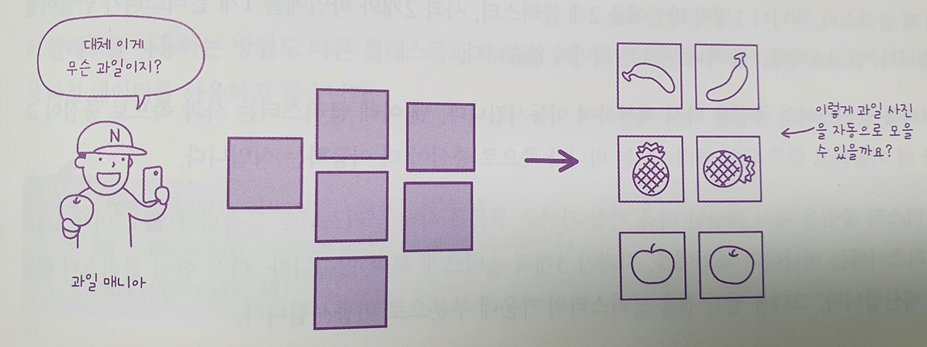  
  
이런 경우 어떻게 평균값을 구할 수 있을까? **k-평균(k-means)** 군집 알고리즘이 평균값을 자동으로 찾아준다. 이 평균값이 클러스터의 중심에 위치하기 때문에 **클러스터 중심(cluster center)** 또는 **센트로이드(centroid)** 라고 부른다.  
  
이번 절에서는 k-평균 알고리즘의 방식을 이해하고 사과, 파인애플, 바나나를 구분하는 비지도 학습 모델을 만들어 볼 것이다.

### k-평균 알고리즘 소개  
k-평균 알고리즘의 작동방식은 다음과 같다.  
1. 무작위로 k개의 클러스터 중심을 정한다.  
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정한다.  
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다.  
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복한다.  
  
그림으로 나타내면 아래와 같다.  
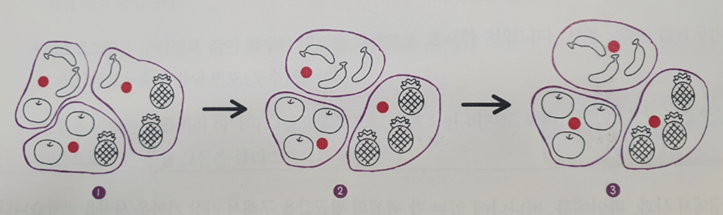  
  
먼저 3개의 클러스터 중심(빨간 점)을 랜덤하게 지정한다(1). 그리고 클러스터 중심에서 가장 가까운 샘플을 하나의 클러스터로 묶는다. 왼쪽 위부터 시계반향으로 바나나 2개와 사과 1개 클러스터, 바나나 1개와 파인애플 2개 클러스터, 사과 2개와 파인애플 1개 클러스터가 만들어졌다. 클러스터에는 순서나 번호는 의미가 없다.  
  
그다음 클러스터의 중심을 다시 계산하여 이동시킨다. 맨 아래 클러스터는 사과 쪽으로 중심이 조금 더 이동하고 왼쪽 위의 클러스터는 바나나 쪽으로 중심이 더 이동하는 식이다.  
  
클러스터 중심을 다시 계산한 다음 가장 가까운 샘플을 다시 클러스터로 묶는다(2). 이제 3개의 클러스터에는 바나나와 파인애플, 사과가 3개씩 올바르게 묶여 있다. 다시 한번 클러스터 중심을 계산한다. 그다음 빨간 점을 클러스터의 가운데 부분으로 이동시킨다.  
  
이동된 클러스터 중심에서 다시 한번 가장 가까운 클러스터로 묶는다(3). 중심에서 가장 가까운 샘플은 이전 클러스터와(2) 동일하다. 따라서 만들어진 클러스터에 변동이 없으므로 k-평균 알고리즘을 종료한다.  
  
k-평균 알고리즘은 처음에는 랜덤하게 클러스터 중심을 선택하고 점차 가장 가까운 샘플의 중심으로 이동하는 비교적 간단한 알고리즘이다. 그럼 이번에는 사이킷런으로 k-평균 모델을 직접 만들어 보자.

### KMeans 클래스  
1절에서 사용했던 데이터셋을 여기서도 사용한다.

In [21]:
# import wget
# url = 'https://bit.ly/fruits_300_data'
# wget.download(url, out = 'fruits_300_v2.npy') ### wget.download 안에 out = '다른이름으로 저장할 파일 이름' 입력

그다음 넘파이 np.load() 함수를 이용해 npy파일을 읽어 넘파이 배열을 준비한다. k-평균 모델을 훈련하기 위해(샘플 개수, 너비, 높이) 크기의 3차원 배열을(샘플 개수, 너비 x 높이) 크기를 가진 2차원 배열로 변경한다.

In [22]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

사이킷런의 k-평균 알고리즘은 sklearn.cluster 모듈 아래 KMeans 클래스에 구현되어 있다. 이 클래스에서 설정할 매개변수는 클러스터 개수를 지정하는 n_clusters이다. 여기에서는 클러스터 개수를 3으로 지정한다.  
  
이 클래스를 사용하는 방법도 다른 클래스들과 비슷하다. 다만 비지도 학습이므로 fit() 메서드에서 타깃 데이터를 사용하지 않는다.

In [23]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장된다. labels_ 배열의 길이는 샘플 개수와 같다. 이 배열은 각 샘플이 어떤 레이블에 해당되는지 나타낸다.  
n_cluster = 3으로 지정했기 때문에 labels_ 배열의 값은 0,1,2 중 하나이다.

In [24]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


레이블값 0, 1, 2와 레이블 순서에는 어떤 의미도 없다. 실제 레이블 0, 1, 2가 어떤 과일 사진을 주로 모았는지 알아보려면 직접 이미지를 출력해야 한다. 그 전에 레이블 0, 1, 2로 모은 샘플의 개수를 확인해 보자.

In [25]:
print(np.unique(km.labels_, return_counts = True))
# np.unique 는 배열 내의 값 중 중복을 제거하여 배열을 생성해 준다.

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


첫 번째 클러스터(레이블 0)가 111개의 샘플을 모았고, 두 번째 클러스터(레이블 1)가 98개의 샘플을 모았다. 세 번째 클러스터(레이블 2)는 91개의 샘플을 모았다.  
그럼 각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력하기 위해 간단한 유틸리티 함수 draw_fruits()를 만들어 보자.

In [26]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1):
    n = len(arr)    # n은 샘플 개수이다.
    # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.
    rows = int(np.ceil(n/10))    # np.ceil은 주어진 숫자와 같은 정수 또는 주어진 숫자보다 큰 가장 가까운 정수를 반환
    # 행이 1개이면 열의 개수는 샘플 개수이다. 그렇지 않으면 10개이다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n개 까지만 그린다.
                axs[i, j].imshow(arr[i*10 + j], cmap = 'gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits() 함수는 (샘플 개수, 너비, 높이)의 3차원 배열을 입력받아 가로로 10개씩 이미지를 출력한다. 샘플 개수에 따라 행과 열의 개수를 계산하고 figsize를 지정한다. figsize는 ratio 매개변수에 비례하여 커진다. ratio의 기본값은 1이다.  
  
그다음 2중 for 반복문을 사용하여 먼저 첫 번째 행을 따라 이미지를 그린다. 그리고 두 번째 행의 이미지를 그리는 식으로 계속된다.  
  
이 함수를 사용해 레이블이 0인 과일 사진을 모두 그려 보자. km.labels_ == 0과 같이 쓰면 km.labels_ 배열에서 값이 0인 위치는 True, 그 외에는 모두 False가 된다. 넘파이는 이런 불리언 배열을 사용해 원소를 선택할 수 있다. 이를 **불리언 인덱싱**이라 하며 4장에서 소개했다.  
넘파이 배열에 불리언 인덱싱을 적용하면 True인 위치의 원소만 모두 추출한다. 즉 다음과 같이 쓸 수 있다.

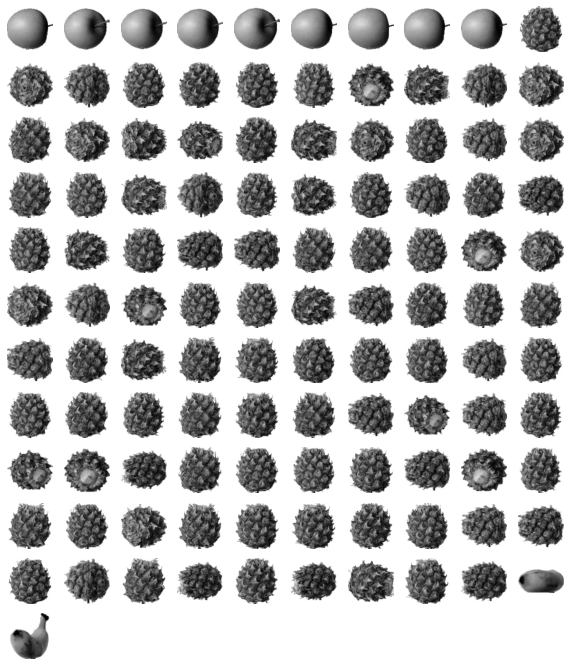

In [27]:
draw_fruits(fruits[km.labels_ == 0])

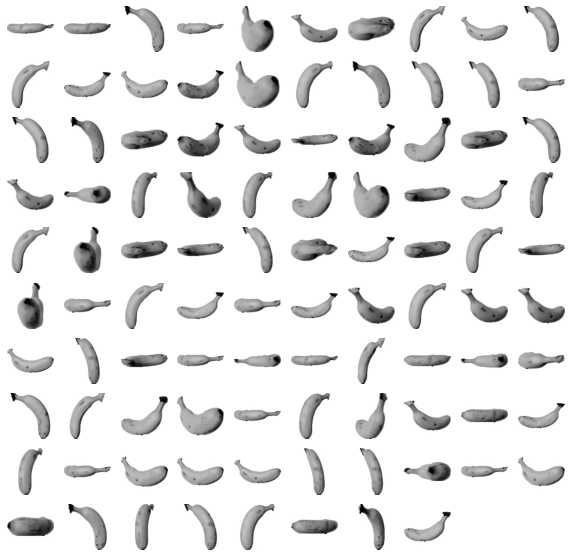

In [28]:
draw_fruits(fruits[km.labels_ == 1])

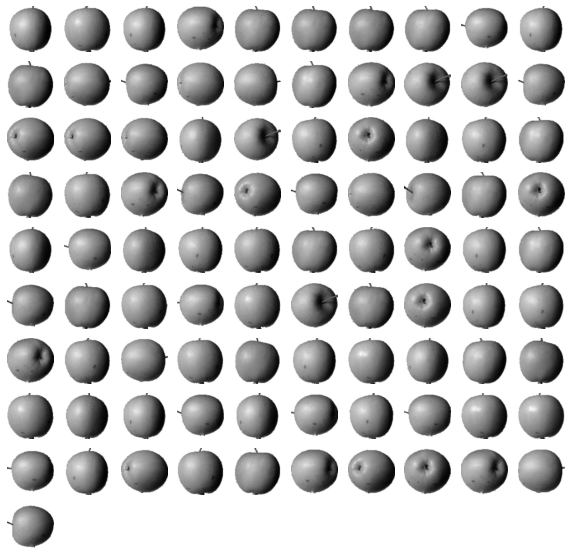

In [29]:
draw_fruits(fruits[km.labels_ == 2])

레이블 1인 클러스터는 바나나로만 이루어져 있고, 레이블 2인 클러스터는 사과로만 이루어져 있다. 하지만 레이블이 0인 클러스터는 파인애플에 사과 9개와 바나나 2개가 섞여 있다. k-평균 알고리즘이 이 샘플들을 완벽하게 구별해내지는 못했다.  
하지만 훈련 데이터에 타깃 레이블을 전혀 제공하지 않았음에도 스스로 비슷한 샘플들을 아주 잘 모았다.

### 클러스터 중심  
KMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centers_ 속성에 저장되어 있다. 이 배열은 fruits_2d 샘플의 클러스터 중심이기 때문에 이미지로 출력하려면 100 x 100 크기의 2차원 배열로 바꿔야 한다.

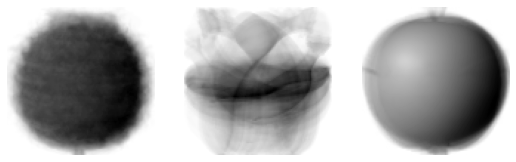

In [30]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio = 3)

이전 절에서 사과, 바나나, 파인애플의 픽셀 평균값을 출력했던 것과 비슷하다.  
  
KMeans 클래스는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해 주는 transform() 메서드를 가지고 있다. transform() 메서드가 있다는 것은 마치 StandardScaler 클래스처럼 특성값을 변환하는 도구로 사용할 수 있다는 의미이다.  
  
인덱스가 100인 샘플에 transform() 메서드를 적용해 보자. fit() 메서드와 마찬가지로 2차원 배열을 기대한다.  
fruits_2d[100]처럼 쓰면 (10000,)크기의 배열이 되므로 에러가 발생한다. 슬라이싱 연산자를 사용해서 (1, 10000) 크기의 배열을 전달해 보자.

In [31]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]
